# EDA for Fake News Detection 
AC215 Group: TBD_1

In this notebook, we aim to analyze the metadata to summarize their main characteristics with several visual methods. As a background, our metadata contains a list of postings from Reddit. Each of them contains a 2-way, 3-way, and 6-way label. 

### 1. Load Packages & Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('multimodal_train_cleaned.tsv', sep='\t')
print(data.head())

           author                                        clean_title  \
0     Alexithymia  my walgreens offbrand mucinex was engraved wit...   
1        VIDCAs17                this concerned sink with a tiny hat   
2  prometheus1123      hackers leak emails from uae ambassador to us   
3             NaN                           puppy taking in the view   
4       3rikR3ith               i found a face in my sheet music too   

    created_utc         domain  hasImage      id  \
0  1.551641e+09    i.imgur.com      True  awxhir   
1  1.534727e+09      i.redd.it      True  98pbid   
2  1.496511e+09  aljazeera.com      True  6f2cy5   
3  1.471341e+09    i.imgur.com      True  4xypkv   
4  1.525318e+09      i.redd.it      True  8gnet9   

                                           image_url linked_submission_id  \
0  https://external-preview.redd.it/WylDbZrnbvZdB...                  NaN   
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...                  NaN   
2  https://external-pre

### 2. Basic Stat

To know more about the data types, missing values, and basic statistics in our metadata:

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288588 entries, 0 to 288587
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   author                274380 non-null  object 
 1   clean_title           288588 non-null  object 
 2   created_utc           288588 non-null  float64
 3   domain                216828 non-null  object 
 4   hasImage              288588 non-null  bool   
 5   id                    288588 non-null  object 
 6   image_url             287730 non-null  object 
 7   linked_submission_id  71760 non-null   object 
 8   num_comments          216828 non-null  float64
 9   score                 288588 non-null  float64
 10  subreddit             288588 non-null  object 
 11  title                 288588 non-null  object 
 12  upvote_ratio          216828 non-null  float64
 13  2_way_label           288588 non-null  float64
 14  3_way_label           288588 non-null  float64
 15  

In [13]:
print(data.describe())

        created_utc   num_comments          score   upvote_ratio  \
count  2.885880e+05  216828.000000  288588.000000  216828.000000   
mean   1.481667e+09      20.987926     423.628793       0.853664   
std    6.899682e+07     144.133202    3209.168151       0.110014   
min    1.217364e+09       0.000000    -950.000000       0.500000   
25%    1.423329e+09       1.000000       5.000000       0.780000   
50%    1.492965e+09       2.000000      14.000000       0.870000   
75%    1.551276e+09       7.000000      47.000000       0.940000   
max    1.571819e+09   10783.000000  137179.000000       1.000000   

         2_way_label   3_way_label    6_way_label  
count  288588.000000  288588.00000  288588.000000  
mean        0.440995       1.09139       1.705258  
std         0.496507       0.98236       1.767785  
min         0.000000       0.00000       0.000000  
25%         0.000000       0.00000       0.000000  
50%         0.000000       2.00000       2.000000  
75%         1.000000   

We can see that each post contains its title, score, upvote_ratio, etc which may contribute a lot to the prediction of fake news. Another important factor is that the 2_way_label is uniformly distributed (with mean=0.440995). This is a good thing because we can train a more robust model. For the 6_way_label, the class distribution is not as uniform.

### 3. EDA

#### 3.1. upvote_ratio
The first thing we want to see is the distribution of upvote ratios.

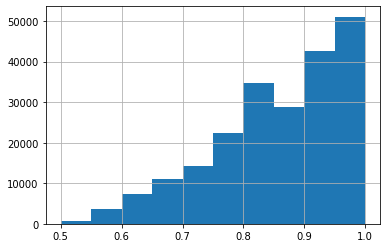

In [14]:
data['upvote_ratio'].hist()
plt.show()

#### 3.2. 2/3/6_way_label 

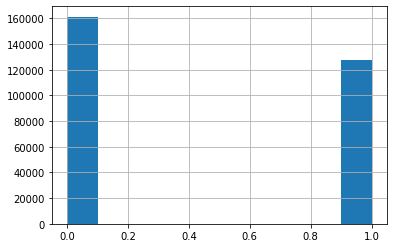

In [15]:
data['2_way_label'].hist()
plt.show()

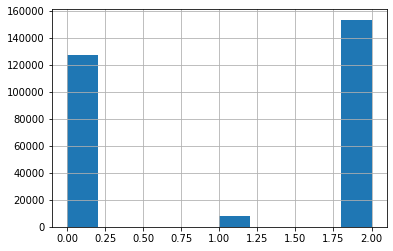

In [23]:
data['3_way_label'].hist()
plt.show()

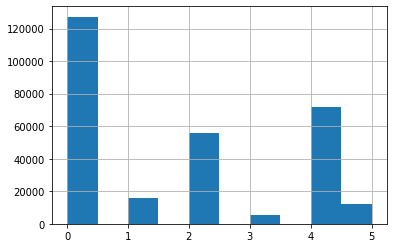

In [24]:
data['6_way_label'].hist()
plt.show()

For 6-way labels, they are not uniformly distributed but still each sub-category contains a good amount of news inside.

#### 3.3 Subreddit counts 


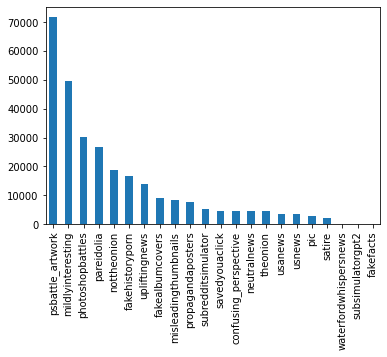

In [22]:
data['subreddit'].value_counts().plot(kind='bar')
plt.show()

We can see that a large proportion of reddits fall into fake subreddits. 

#### 4. Correlation plots and heatmap

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data[['2_way_label', '3_way_label', '6_way_label']])
plt.show()